# 2.9 - Image analysis, pt. 1

### Learning goals for today
1. Understand images as a datatype - be able to inspect and quantify them
2. Use a **pseudocoding** method to write analysis code
3. Learn some basics of automatic cell counting / quantification

---
### How to use this notebook during class
- Follow along as we go
- Use your **Cards** to indicate where you're at:
    - A **🟩Green card** means you are caught up with Max and **ready to help your classmates**
    - A **🟥Red card** means you are stuck and need help
- <span style='color:red;'>EXERCISE</span> — work on this problem by yourself, or try with a partner if you get stuck
---


First let's import some libraries we will use today. Remember if you don't have a library installed you can pip install it with:

%pip install *package_name*

In [1]:
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import skimage
from skimage.io import imread

In [ ]:
# more bits = higher bit depth, so you can incorporate more t values

In [ ]:
# note: .jpeg is a compression type of file - don't convert scientific data/images to this and then do math on it!!

In [ ]:
# Today: cell quantification/counting! 

## 1) Loading, inspecting, and indexing images

In [5]:
data_directory = 'C:/Users/denis/Downloads/'
filepath = os.path.join(data_directory, 'xy_8bit__mitocheck_incenp_t1 (1).tif')

assert os.path.isfile(filepath)

In [ ]:
# Note: needs the ".file type" included at the end. (won't work without ".tif" or ".csv" etc.)

In [8]:
img_cells = imread(filepath)
type(img_cells)

numpy.ndarray

### <span style='color:red;'>EXERCISE 1</span>: Show the image (5 min)
Use **pyplot** to show the image.
Look it up on Google, stack exchange, or an LLM

The university has a license with MS copilot (https://microsoft365.com/copilot)



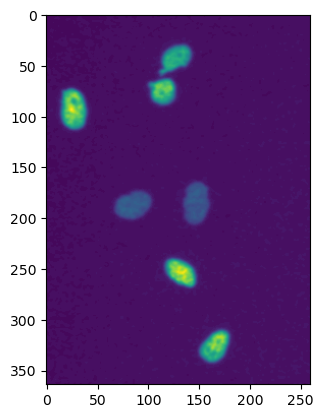

In [9]:
plt.imshow(img_cells)

An image is just an ndarray

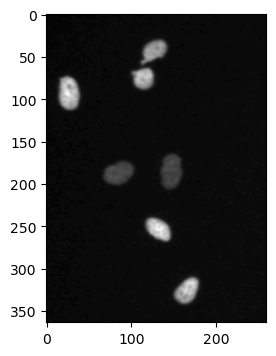

In [10]:
fh, ax = plt.subplots(1,1,figsize=(4,4))
ax.imshow(img_cells, cmap='gray')

In [ ]:
# Note: set to grayscale so people don't think your original image has a color element if it doesn't!

In [11]:
print(type(img_cells))
print(img_cells.shape)

<class 'numpy.ndarray'>
(364, 260)


In [ ]:
#somehwere in your metadata should tell you what things are (what's x, y, 3rd dimension, etc.)

You can index into an image just like any array. But note the first dimension is Y (rows of the matrix) and the second is X (columns)

Also note the direction of the y axis when displaying the image

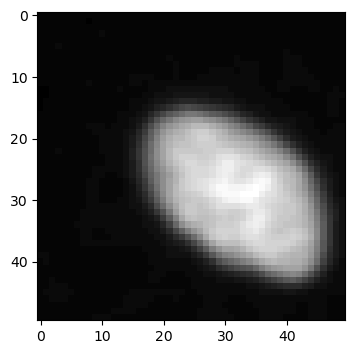

In [12]:
fh, ax = plt.subplots(1,1,figsize=(4,4))
ax.imshow(img_cells[225:275,100:150], cmap='gray')

In [ ]:
# the [] numbers are the rows and columns (rows are y, columns are x)
# below, use indexing to change things!

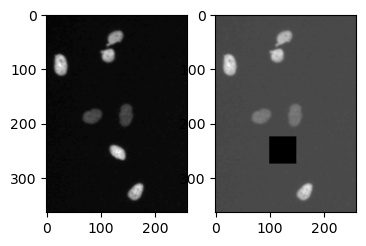

In [20]:
tmp_image = img_cells.copy()
tmp_image[225:275,100:150] = 0

fh, ax = plt.subplots(1,2,figsize=(4,4))
ax[0].imshow(img_cells, cmap='gray')

# axis index 0, the original image "img_cells"

ax[1].imshow(tmp_image, cmap='gray')

#axis index 1 is the new image "tmp_image"

### <span style='color:red;'>EXERCISE 2</span>: Calculate image statistics (5 min)
Compute the **mean** and **median** intensity value of the image

In [25]:
#MyAttempt

mean_intensity = np.mean(img_cells)
print(mean_intensity)

median_intensity = np.median(img_cells)
print(median_intensity)

20.16925190194421
19.0


In [28]:
#Professor's Solution

print(np.mean(img_cells))
print(np.median(img_cells))

20.16925190194421
19.0


## 2) Automatic cell detection

The overall goal here is to automatically detect cells, count them, and compute stats like the size and mean intensity

The first thing we want to do is create a **binary mask** for the image that identifies individual cells. To do this, let's try a **pseudocode** approach that allows us to not get lost in unfamiliar syntax. Pseudocoding has three steps:
1. Write (as comments) what you want to do and what the result should look like
2. Look up how to implement each command with: Google, StackExchange, LLMs*
3. Test your possible solution against your expectation from (1)


*https://microsoft365.com/copilot

In [ ]:
# what are the algorithmic steps you want to do?
# find some intensity value to call a cell (set a threshhold value)
# this will ask "pixel by pixel, is this above the threshold" 
# we're making a new binary image (0s and 1s for below or above threshold), not editing the original image

25.70354887623576


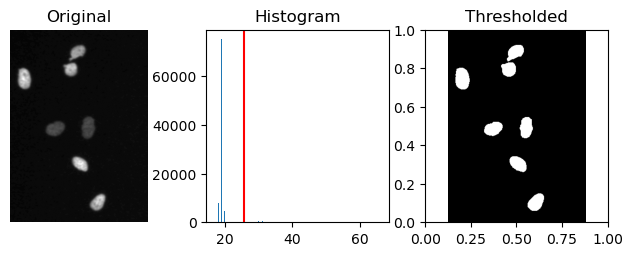

In [41]:
# Find a threshold intensity value to binarize the image
# THis should be a number. Values higher than this are included, lower are excluded.
from skimage.filters import threshold_li
thresh = threshold_li(img_cells)
print(thresh)

# Look at the threshold compared to the distribution of pixel intensities
# Make a histogram of the pixel intensities and then figure out how to analyze it
binary = img_cells > thresh
fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(img_cells, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(img_cells.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

# Note: the bins=256 above is for 2^8 for 8-bit images (which is what our image is :))

#Apply the threshold to return a binary mask
# mask is the same size (same # of x and y rows and columns) as the image, but all the values should be True/False (1 bit image)

# view the mask alongside the original image

In [ ]:
# Professor's Solution

fh, ax = plt.subplots(1,1,figsize=(6,6))
ax.hist(img_cells.flatten(), bins=50)


### <span style='color:red;'>EXERCISE 3</span>: Finish steps 2 & 3 for the remaining commands  (20 min)
For each of the remaining commands: look up how to implement the command, check to make sure it's doing what you want, and check your solution against your neighbors

If you are stuck, you can work with a neighbor to try to improve your search/prompt terms


Scikit image has tools to **label** and measure segmented objects in the image

We can use the labels image to give us a mask for each cell. We're going to use each cell's mask to find the cell's area and mean intensity.

To go through each label we'll use a **for-loop**

### <span style='color:red;'>BONUS EXERCISE</span>: Write a cell quantification function  (10 min)


Let's use our new function